# Mushroom Dataset for Evaluating classification models 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv(r"C:\Users\WELCOME\Downloads\Random Forests Implementation\Random Forests Implementation\mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Data Preprocessing

In [3]:
data.shape

(8124, 23)

In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [8]:
data.isnull().sum().sum()

np.int64(0)

In [9]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Encoding Categorical data types

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data.head())    

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

### Data Splitting

In [11]:
x = data.drop('class', axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Evaluation - RandomForestClassifier 

In [12]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [13]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
y_predict = model.predict(x_test)

### Evaluation Metrices of RandomForestClassifier

In [15]:
rfe_acc = accuracy_score(y_test, y_predict)

In [17]:
print("Accuracy:", rfe_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))

Accuracy: 1.0

Confusion Matrix:
 [[843   0]
 [  0 782]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Model Evaluation - AdaBoostClassifier

In [18]:
adaboost = AdaBoostClassifier()
adaboost

AdaBoostClassifier()

In [19]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [20]:
y_pred = adaboost.predict(x_test)

### Evaluation Metrices of AdaBoostClassifier

In [21]:
adb_acc = accuracy_score(y_test, y_pred)

In [22]:
print("Accuracy:", adb_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9926153846153846

Confusion Matrix:
 [[843   0]
 [ 12 770]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### Accuracy comparision by Visualization

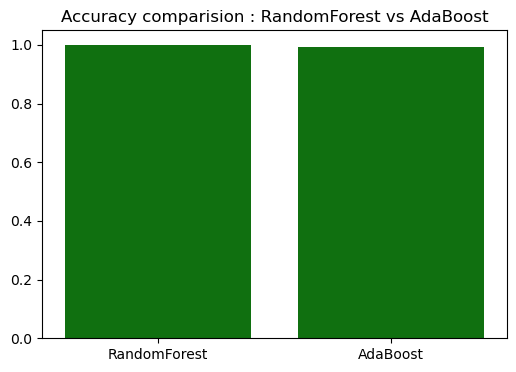

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x = ['RandomForest', 'AdaBoost'], y = [rfe_acc, adb_acc], color='green')
plt.title("Accuracy comparision : RandomForest vs AdaBoost")
plt.show()

### Insights
- The accuracy score of Random forest is around 1.0.
- The accuracy score of Random forest is around 0.99.
- Both Randomforest and Adaboost have approximately same accuracy scores.

### Feature Importance

In [32]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
4                       odor    0.162517
7                  gill-size    0.106641
8                 gill-color    0.102078
19         spore-print-color    0.097402
18                 ring-type    0.089369
20                population    0.059521
3                    bruises    0.058446
10                stalk-root    0.057573
12  stalk-surface-below-ring    0.057226
6               gill-spacing    0.045963
21                   habitat    0.033545
11  stalk-surface-above-ring    0.032472
9                stalk-shape    0.020794
13    stalk-color-above-ring    0.018193
2                  cap-color    0.014238
14    stalk-color-below-ring    0.012627
17               ring-number    0.011165
1                cap-surface    0.011086
0                  cap-shape    0.005019
16                veil-color    0.002861
5            gill-attachment    0.001262
15                 veil-type    0.000000


### Feature Importance by Visualization

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_15084\3643931205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Set2')


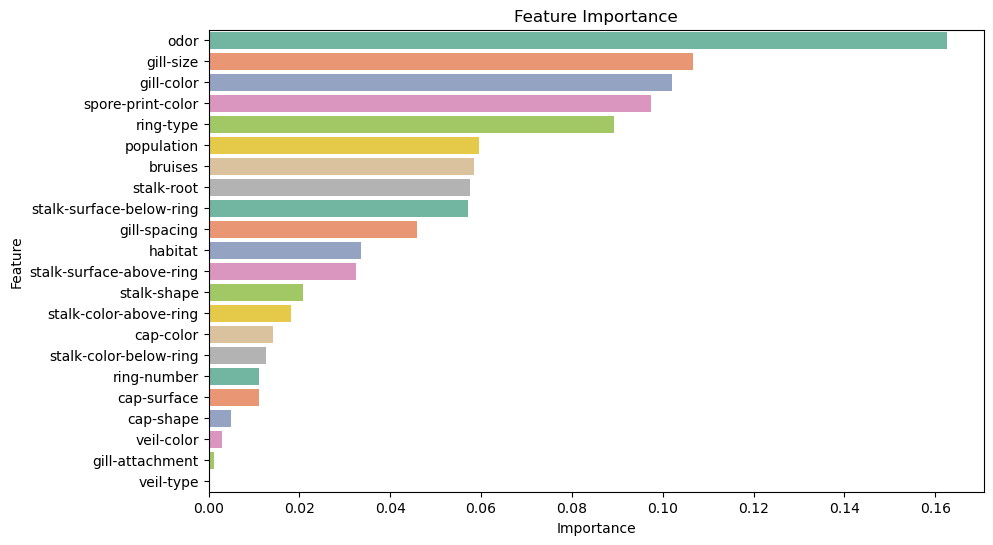

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Set2')
plt.title('Feature Importance')
plt.show()